 
# NETWORK BIOLOGY 
  
## Assignment 1

####  Submitted By: 
#####  Divyanshu Srivastava (MT16125)


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

##### Question 1 - Watts and Strogatz small world network model

In [43]:
# Regular graph initialization
nodes = 1000
k = 10

adj = np.zeros([nodes, nodes])

for i in range(0, nodes):
    for j in range(1, k/2 + 1):
        adj[i, (i+j) % nodes] = 1
        adj[(i+j) % nodes, i] = 1  

edgelist = np.zeros([nodes*k/2, 2])
iterator = 0

for i in range(0, nodes-1):
    for j in range(i+1, nodes):
        if adj[i, j] == 1:
            edgelist[iterator, 0] = i
            edgelist[iterator, 1] = j
            iterator += 1

G = nx.Graph()
G.add_edges_from(edgelist)
# print adj
# print sum(adj)
# G = nx.random_regular_graph(k, nodes)
G_copy = G

# plt.clf()
# pos=nx.spring_layout(G) # positions for all nodes
# nx.draw(G, pos)
# #nx.draw_networkx_labels(G, pos)
# plt.title('Initial Regular Graph')
# plt.show()

In [44]:
# plt.clf()
# pos=nx.spring_layout(G) # positions for all nodes
# nx.draw(G, pos)
# nx.draw_networkx_labels(G, pos)
# plt.title('Initial Regular Graph')
# plt.show()

prob = list()
prob.append(0.0001)
while prob[-1] < 1:
    prob.append(prob[-1]*2.303)
prob = prob[0:-1]

L = np.zeros_like(prob)
C = np.zeros_like(prob)

G = G_copy

L[0] = nx.average_shortest_path_length(G)
C[0] = nx.average_clustering(G)



iterator = 1
for p in prob:
    G = G_copy
    for n in G.nodes():
        for e in G.edges(n):
            if np.random.rand() < p:
                ## perform rewiring
                neighbours = np.array(G.edges(n))[:,1]
                new_node = np.random.randint(1, high=nodes+1)
                while new_node in neighbours:
                    new_node = np.random.randint(1, high=nodes+1)
                G.remove_edge(e[0], e[1])
                G.add_edge(e[0], new_node)
    
    L[iterator] = nx.average_shortest_path_length(G)
    C[iterator] = nx.average_clustering(G)
    iterator += 1
    

## TODO: Capture graph disconnected condition on rewiring

L /= L[0]
C /= C[0]

NetworkXError: Graph is not connected.

In [ ]:
p = 0.01;
for n in G.nodes():
    for e in G.edges(n):
        if np.random.rand() < p:
            ## perform rewiring
            neighbours = np.array(G.edges(n))[:,1]
            new_node = np.random.randint(1, high=nodes+1)
            while new_node in neighbours:
                new_node = np.random.randint(1, high=nodes+1)
            G.remove_edge(e[0], e[1])
            G.add_edge(e[0], new_node)

print nx.average_shortest_path_length(G)/L[0]
print nx.average_clustering(G)/C[0]

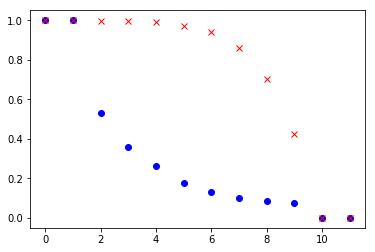

In [60]:
plt.plot(L, 'bo', C, 'rx')

plt.show()

In [54]:
?plt.plot()